In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
import joblib

# Show plots inline
%matplotlib inline

# Set plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [3]:
# Step 2: Load dataset
data_path = r"C:\Users\Lenovo\OneDrive\Documents\heart_disease\Heart Disease\dataset.csv"

df = pd.read_csv(data_path)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (1190, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
# Step 3: Explore data
print("Dataset Information:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
df.describe().T


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB

Missing Values:
age                    0
sex                    0
chest pain type        0
resting bp s           0
ch

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


Available columns: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


<Figure size 600x400 with 0 Axes>

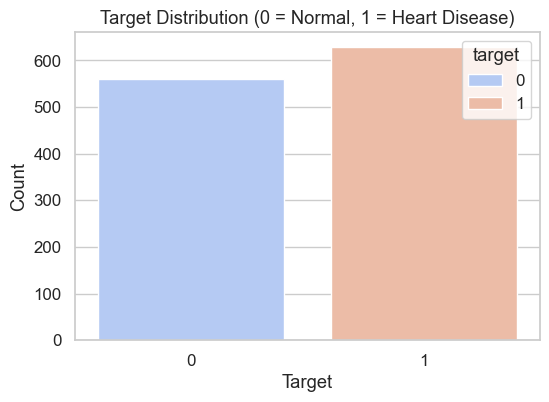

In [11]:
# Step 4: Target distribution (Corrected for your dataset)

# Confirm available columns
print("Available columns:", df.columns.tolist())

# Set correct target column
target_col = 'target'  # since your dataset uses this as the label

# Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, hue=target_col, palette='coolwarm')
plt.title('Target Distribution (0 = Normal, 1 = Heart Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


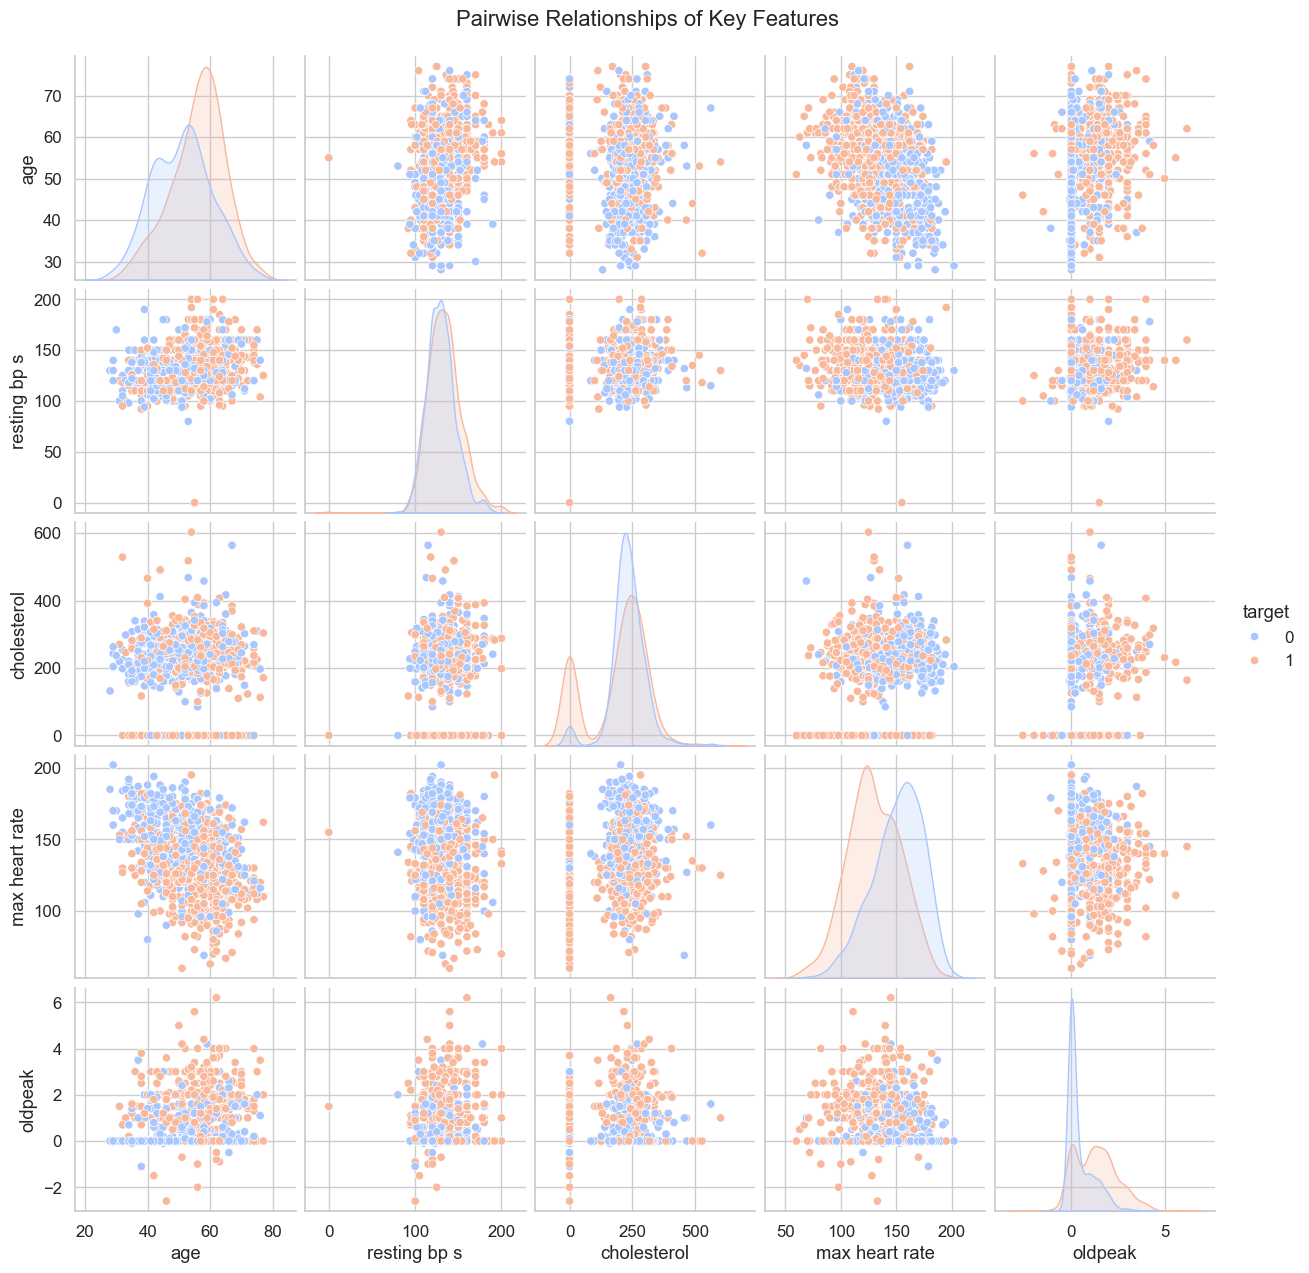

In [15]:
# Step 5: Quick look at relationships (Fixed for your dataset)

sample_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Add the correct target column
sns.pairplot(df[sample_cols + ['target']], hue='target', diag_kind='kde', palette='coolwarm')
plt.suptitle("Pairwise Relationships of Key Features", y=1.02)
plt.show()


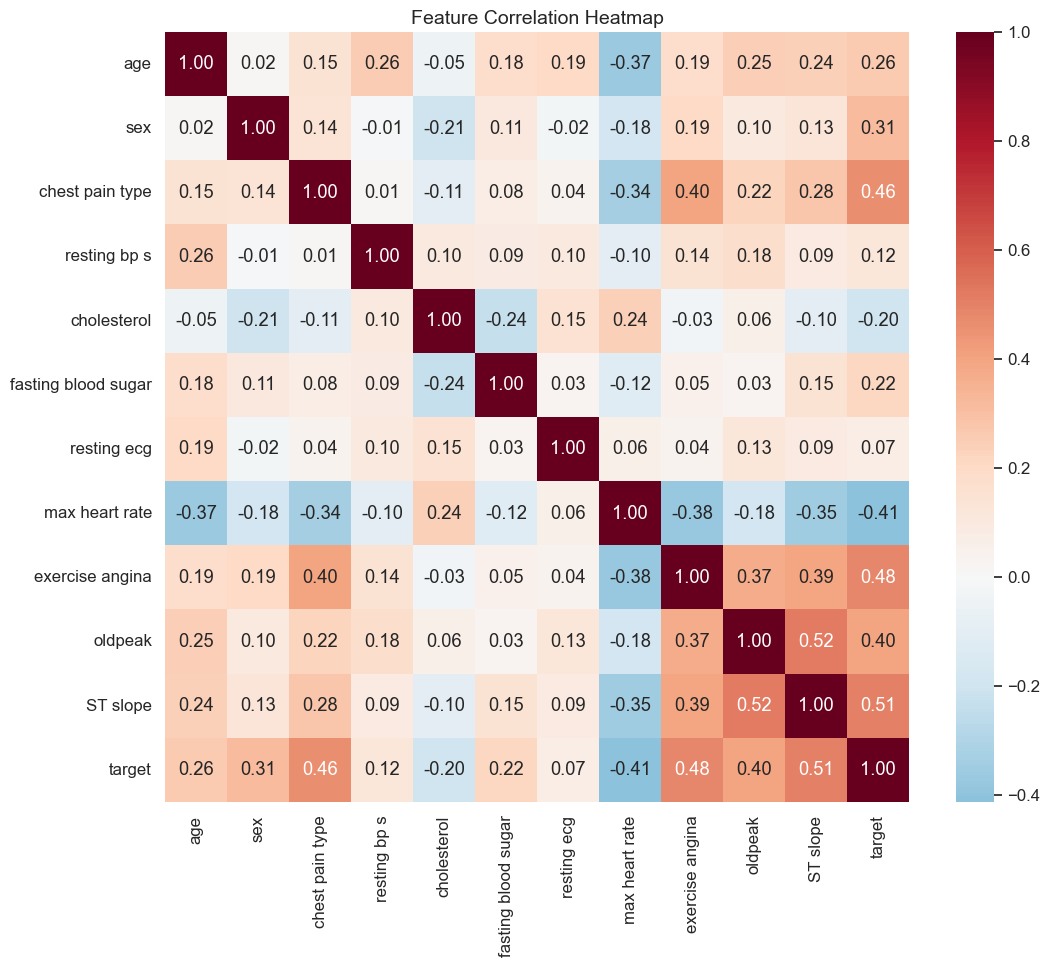

In [17]:
# Step 6: Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [21]:
# Step 9: Split data and define features and target (Fixed for your dataset)

print("Normalized Columns:\n", df.columns.tolist())

# Correct target column name
target = 'target'

# Split data
X = df.drop(columns=[target])
y = df[target]

# Identify categorical features
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

print(f"\nCategorical columns: {list(cat_cols)}")
print(f"Numerical columns: {list(num_cols)}")


Normalized Columns:
 ['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'st_slope', 'target']

Categorical columns: []
Numerical columns: ['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'st_slope']


In [25]:
# Step 7: Split the dataset and apply scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (952, 11)
Test shape: (238, 11)


Logistic Regression Accuracy: 0.840
Logistic Regression ROC-AUC: 0.904

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       112
           1       0.84      0.86      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



<Figure size 700x500 with 0 Axes>

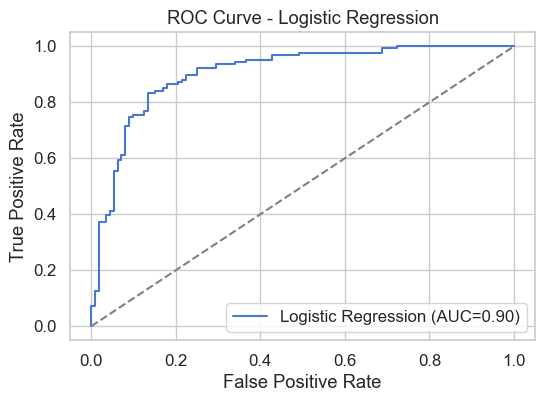

In [37]:
# Step 8: Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_scaled)
y_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
log_acc = accuracy_score(y_test, y_pred_log)
log_roc = roc_auc_score(y_test, y_proba_log)

print(f"Logistic Regression Accuracy: {log_acc:.3f}")
print(f"Logistic Regression ROC-AUC: {log_roc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={log_roc:.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


Random Forest Accuracy: 0.929
Random Forest ROC-AUC: 0.971

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       112
           1       0.93      0.94      0.93       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



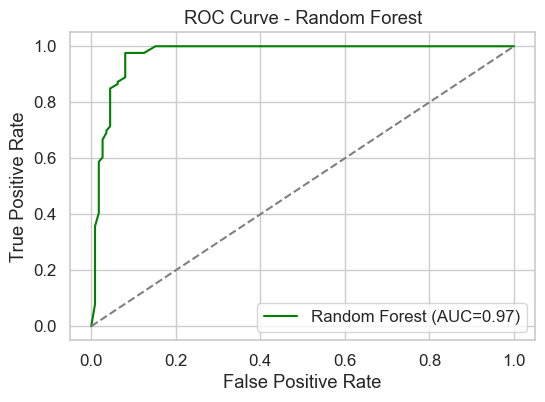

In [39]:
# Step 9: Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_roc = roc_auc_score(y_test, y_proba_rf)

print(f"Random Forest Accuracy: {rf_acc:.3f}")
print(f"Random Forest ROC-AUC: {rf_roc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={rf_roc:.2f})", color='green')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


In [41]:
# Step 10: Select Best Model & Save

import joblib

if rf_acc >= log_acc:
    best_model = rf_model
    best_name = "RandomForest"
else:
    best_model = log_model
    best_name = "LogisticRegression"

print(f"Best Model: {best_name}")

# Save model and scaler
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Best Model: RandomForest
Model and scaler saved successfully!


In [43]:
# Step 11: Load and Test Saved Model

loaded_model = joblib.load("best_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Take one random test sample
import numpy as np
sample = X_test.iloc[0:1]
sample_scaled = loaded_scaler.transform(sample)

pred = loaded_model.predict(sample_scaled)
prob = loaded_model.predict_proba(sample_scaled)[:,1]

print("Predicted Class:", int(pred[0]))
print("Predicted Probability of Heart Disease:", round(prob[0], 3))


Predicted Class: 1
Predicted Probability of Heart Disease: 0.98


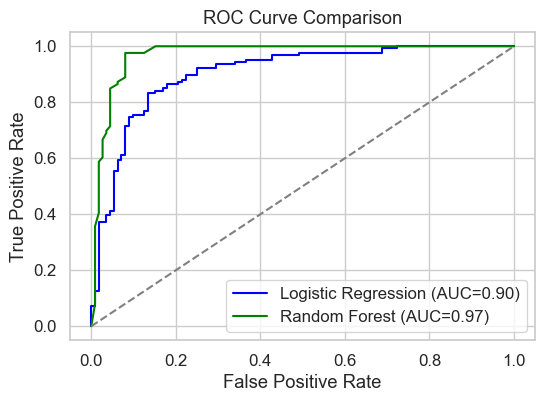

In [45]:
# Step 12: Compare ROC Curves

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={log_roc:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={rf_roc:.2f})", color='green')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
